In [97]:
#load all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import sys
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.io import arff

The dataset is archived from the Kaggle contains dataset from the Mulstiple ADHD imaging. The project initially was designed to work with Deep learning. But, we can test with any ML models that is capable of working as a classifier.

In [98]:
#load the data called Autism_data.arff
data = pd.read_csv('Autism_Data.arff')
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [99]:
#instead of calling a define function, we can use the for loop to count the number of missing values in each column
#count NA values in each of the columns
for i in data.columns:
    print(i, data[i].isna().sum())

A1_Score 0
A2_Score 0
A3_Score 0
A4_Score 0
A5_Score 0
A6_Score 0
A7_Score 0
A8_Score 0
A9_Score 0
A10_Score 0
age 0
gender 0
ethnicity 0
jundice 0
austim 0
contry_of_res 0
used_app_before 0
result 0
age_desc 0
relation 0
Class/ASD 0


In [100]:
#print unique values in each of the columns
for i in data.columns:
    print(i, data[i].unique())

A1_Score [1 0]
A2_Score [1 0]
A3_Score [1 0]
A4_Score [1 0]
A5_Score [0 1]
A6_Score [0 1]
A7_Score [1 0]
A8_Score [1 0]
A9_Score [0 1]
A10_Score [0 1]
age ['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' '?' '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56' '61'
 '59' '52' '49' '51']
gender ['f' 'm']
ethnicity ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']
jundice ['no' 'yes']
austim ['no' 'yes']
contry_of_res ["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland'
 "'United Arab Emirates'" 'Afghanistan' 'Lebanon' "'United Kingdom'"
 "'South Africa'" 'Italy' 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China'
 'Australia' 'Canada' "'Saudi Arabia'" 'Netherlands' 'Romania' 'Sweden'
 'Tonga' 'Oman' 'India' 'Philippines' "'Sri Lanka

Two columns contains values of `?` in their columns. This has to do something. Filter only these columns and see if there is 
association with some other columns.

In [101]:
#check if ethinicity is ?, is the relation also ?
for i in data.columns:
    if (data[i]=="?").any():
        print(i)

age
ethnicity
relation


In [102]:
#for all columns with ?, replace wtih NaN
for i in data.columns:
    if (data[i]=="?").any():
        data[i] = data[i].replace("?", np.nan)

The data is cleaned. Now, formulate the questions and hypothesis that can be answered.
Maybe it is important to see like which of the 10 variables has the most important. But, before important and quick tips ??
Don't forget encoding. Machine does not character as you do. Standarization not requierd, because most columns are binary and categorical, 
and all are one hot encoded.

In [103]:
#perform one hot ecnodig for all the columns with object data type
data_encoded = pd.get_dummies(data, columns=["gender", "ethnicity", "jundice", 
                                     "austim", "contry_of_res", "used_app_before", "relation", "Class/ASD"])

data_encoded


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res_Uruguay,used_app_before_no,used_app_before_yes,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self,Class/ASD_NO,Class/ASD_YES
0,1,1,1,1,0,0,1,1,0,0,...,False,True,False,False,False,False,False,True,True,False
1,1,1,0,1,0,0,0,1,0,1,...,False,True,False,False,False,False,False,True,True,False
2,1,1,0,1,1,0,1,1,1,1,...,False,True,False,False,False,True,False,False,False,True
3,1,1,0,1,0,0,1,1,0,1,...,False,True,False,False,False,False,False,True,True,False
4,1,0,0,0,0,0,0,1,0,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,False,True,False,False,False,False,False,True,False,True
700,1,0,0,0,0,0,0,1,0,1,...,False,True,False,False,False,True,False,False,True,False
701,1,0,1,1,1,0,1,1,0,1,...,False,True,False,False,False,False,False,False,False,True
702,1,0,0,1,1,0,1,0,1,1,...,False,True,False,False,False,False,False,True,True,False


In [104]:
#run another hot enoding methods from one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
data_encoded_onehot = pd.DataFrame(enc.fit_transform(data[["gender", "ethnicity", "jundice", 
                                     "austim", "contry_of_res", "used_app_before", "relation", "Class/ASD"]]).toarray())

data_encoded_onehot

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
700,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
702,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [105]:
# select from first column to second last column
X = data_encoded_onehot.iloc[:, :-1]

# select the last column
y = data_encoded_onehot.iloc[:, -1]

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((563, 94), (141, 94), (563,), (141,))

This is a classfication job. So, all machine learning models capabale of classification can be used here. Linear regression is no chance, otherwise I would simply use it but it does not have the availble to classify. The couple avialable options from me are 
1. Logistic Regression
2. Decision Tree
3. Random Forest

I will test will all these models, runs for couple epochs and evaluate the best model with highest accuracy.

In [107]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

#predict the model
y_pred = logistic_model.predict(X_test)

In [108]:
#calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

#calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_log = confusion_matrix(y_test, y_pred) 

confusion_matrix_log, accuracy


(array([[105,   0],
        [  0,  36]], dtype=int64),
 1.0)

In [109]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

#predict the model
y_pred = decision_tree_model.predict(X_test)

# #calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# confusion_matrix, accuracy
confusion_matrix_dec = confusion_matrix(y_test, y_pred)

confusion_matrix_dec, accuracy

(array([[105,   0],
        [  0,  36]], dtype=int64),
 1.0)

In [110]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

#tune the model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

c:\Users\sujan\anaconda3\envs\sujan_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sujan\anaconda3\envs\sujan_env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sujan\anaconda3\envs\sujan_env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\sujan\anaconda3\envs\sujan_env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_con

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [111]:
#predict the model
y_pred = grid_search.predict(X_test)

#calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

#create confusion matrix
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred)

# confusion_matrix, accuracy
confusion_matrix_random_forest, accuracy

(array([[105,   0],
        [  0,  36]], dtype=int64),
 1.0)

For all models, the accuracy is 100%. But is it not good ? 
-seems like the machine model learnt too well. Unless sombody gives a random data, I still can' t say. It should almost be imposisble for these
machine to learn it so well that they have 100%. Or it is likely that the data given is sufficient to produce the desire ouptut.

We can reduce the number of variables passed to it, making it less robust model. 

In [112]:
#plot importance of features in the random forest model
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, index=X.columns, 
                                      columns=["importance"]).sort_values("importance", ascending=False)

#filter the top 10 features
top_10_features = feature_importances_df.head(10).sort_values("importance", ascending=True)
top_10_features

,importance
26,0.013496
91,0.013866
17,0.013900
56,0.014198
2,0.014929
45,0.015291
16,0.015413
28,0.027612
11,0.053110
93,0.632774


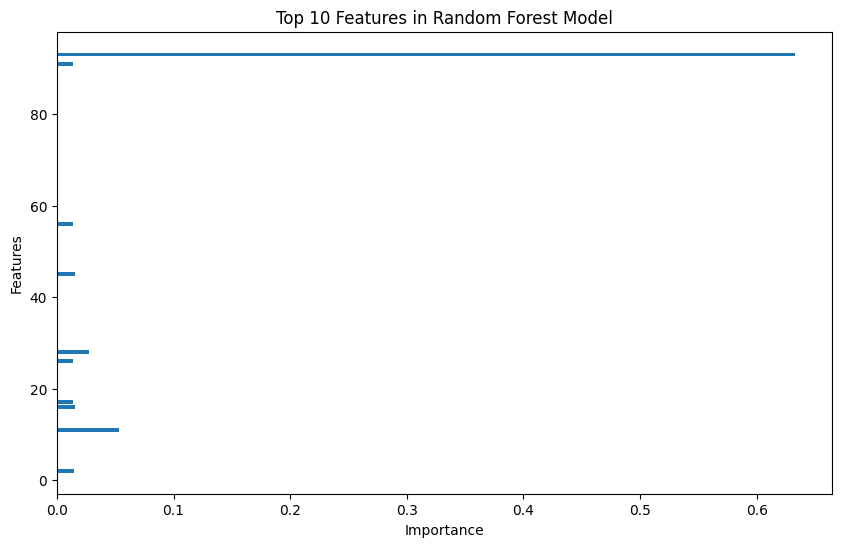

In [113]:

#plot the top 10 features in hotizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features.index, top_10_features["importance"])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Features in Random Forest Model")
plt.show()


The A2 score has highest sensitivity to the ADHD screening. What this means is that the A2 score is the most important feature in predicting the ADHD screening. The A2 score is the score of the Autism Spectrum Quotient (AQ) test. The AQ test is a psychological questionnaire that assesses the presence of autism spectrum disorder (ASD) symptoms in adults. The AQ test has 50 questions that are divided into five subscales: social skills, attention switching, attention to detail, communication, and imagination. The A2 score is the score of the second question in the AQ test.

Now, I will truncate the data to include only the 10 columns to see the performance of the overall random forest model. 

In [114]:
#filter for first 8 columns
truncate_data = data.iloc[:, :10]
truncate_data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,1,1,0,0,1,1,0,0
1,1,1,0,1,0,0,0,1,0,1
2,1,1,0,1,1,0,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1
4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1
700,1,0,0,0,0,0,0,1,0,1
701,1,0,1,1,1,0,1,1,0,1
702,1,0,0,1,1,0,1,0,1,1


In [115]:
#perform the split
X = truncate_data.iloc[:, :-1]
y = truncate_data.iloc[:, -1]
 
#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# use random forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

#use grid search to tune the model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50]
}

#use grid search to tune the model
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

#fit the model
grid_search.fit(X_train, y_train)

#predict the model
y_pred = grid_search.predict(X_test)

#calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is {accuracy}')

Reducing the variables to 10, reduced the model accuracy to 0.63. This means the data contains enough formation to classify somebody as ADHD or not. This is a great data.